In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

from scipy import stats
from numpy.random import randn

import matplotlib as mlt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from __future__ import division

In [2]:
import requests
from StringIO import StringIO

In [3]:
url='http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'

In [4]:
source=requests.get(url).text
poll_data=StringIO(source)

In [5]:
poll_df=pd.read_csv(poll_data)

In [6]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


In [7]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Data columns (total 14 columns):
Pollster                  589 non-null object
Start Date                589 non-null object
End Date                  589 non-null object
Entry Date/Time (ET)      589 non-null object
Number of Observations    567 non-null float64
Population                589 non-null object
Mode                      589 non-null object
Obama                     589 non-null int64
Romney                    589 non-null int64
Undecided                 422 non-null float64
Pollster URL              589 non-null object
Source URL                587 non-null object
Partisan                  589 non-null object
Affiliation               589 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 69.0+ KB


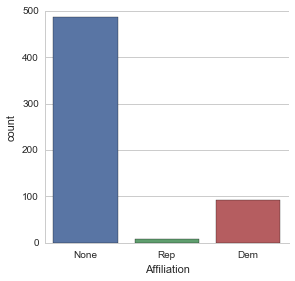

In [8]:
sns.factorplot('Affiliation',data=poll_df,kind='count')

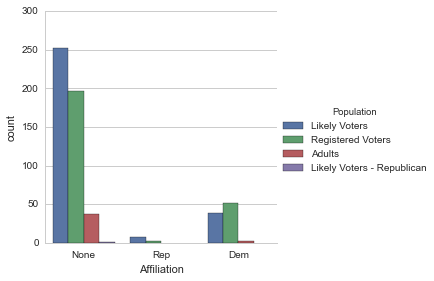

In [9]:
sns.factorplot('Affiliation',data=poll_df,hue='Population',kind='count')

In [10]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


In [11]:
avg=pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations',axis=0,inplace=True)

In [12]:
avg.head()

,0
Obama,46.772496
Romney,44.573854
Undecided,6.549763


In [13]:
std=pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)

In [14]:
std

,0
Obama,2.448627
Romney,2.927711
Undecided,3.702235


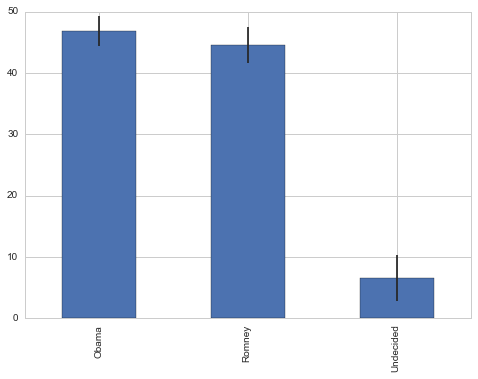

In [15]:
avg.plot(yerr=std,kind='bar',legend=False)

In [16]:
poll_avg=pd.concat([avg,std],axis=1)

In [17]:
poll_avg.columns=['Average','STD']

In [18]:
poll_avg

,Average,STD
Obama,46.772496,2.448627
Romney,44.573854,2.927711
Undecided,6.549763,3.702235


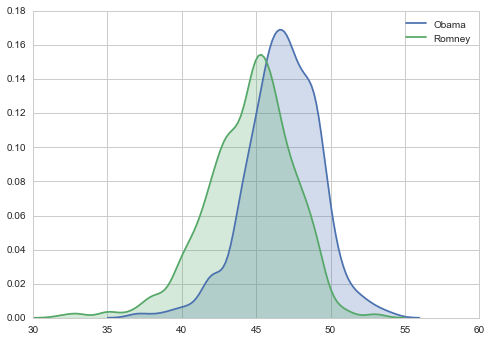

In [19]:
sns.kdeplot(poll_df['Obama'],shade=True)
sns.kdeplot(poll_df['Romney'],shade=True)

In [20]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


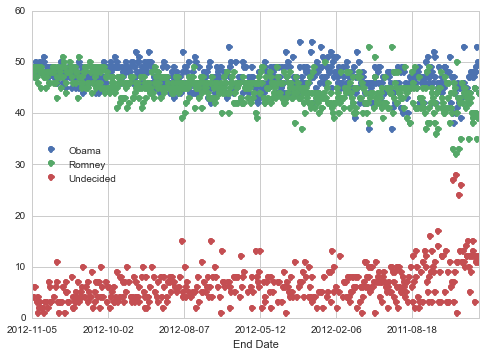

In [21]:
poll_df.plot('End Date',['Obama','Romney','Undecided'],linestyle='',marker='o')

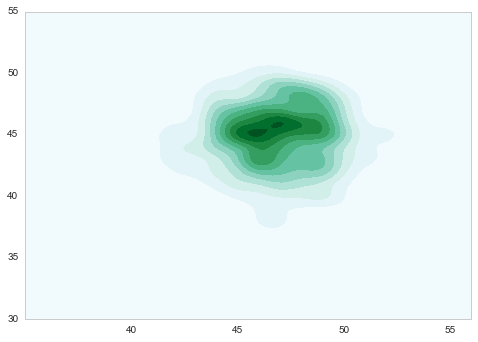

In [22]:
sns.kdeplot(poll_df[['Obama','Romney']],shade=True)


In [23]:
from datetime import datetime

In [24]:
poll_df['Difference']=(poll_df['Obama']-poll_df['Romney'])/100

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,0.01
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,0.00
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01


In [25]:
poll_df=poll_df.groupby(['Start Date'],as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Difference
0,2009-03-13,1403,44,44,12,0.00
1,2009-04-17,686,50,39,11,0.11
2,2009-05-14,1000,53,35,12,0.18
3,2009-06-12,638,48,40,12,0.08
4,2009-07-15,577,49,40,11,0.09


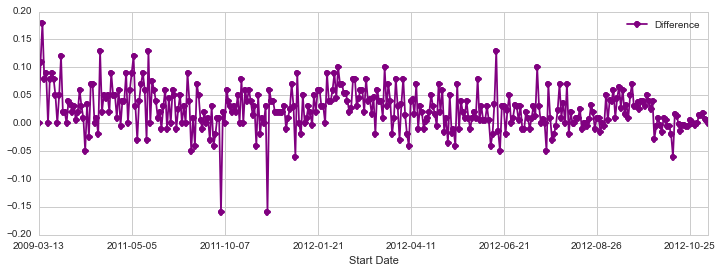

In [26]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

In [27]:
row_in=0
xlimit=[]

for date in poll_df['Start Date']:
    if date[0:7]=='2012-10':
        xlimit.append(row_in)
        row_in+=1
    else:
        row_in+=1
print min(xlimit)
print max(xlimit)

329
356


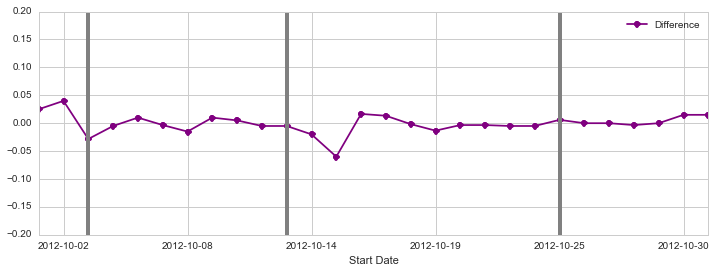

In [28]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(329,356))
plt.axvline(x=329+2,linewidth=4,color='grey')
plt.axvline(x=329+10,linewidth=4,color='grey')
plt.axvline(x=329+21,linewidth=4,color='grey')

In [29]:
donor_df=pd.read_csv('Election_Donor_Data.csv')

C:\Users\Bose\AppData\Local\Dato\Dato Launcher\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [30]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.686334e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.245483e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.190165e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [31]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 129.9+ MB


In [32]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 180.95          1
 223.10          1
-1545.12         1
 1179.88         1
-226.20          1
 178.05          1
 122.14          1
 79.95           1
 130.80          1
 314.60          1
 121.58          1
-195.32          1
 201.24          1
 152.05          1
 59.49           1
 0.88            1
 19.35           1
 58.18           1
 71.20           1
 70.68           1
 163.90          1
 14.97      

In [33]:
don_mean=donor_df['contb_receipt_amt'].mean()
don_std=donor_df['contb_receipt_amt'].std()

print don_mean
print don_std

298.235150095
3749.66672327


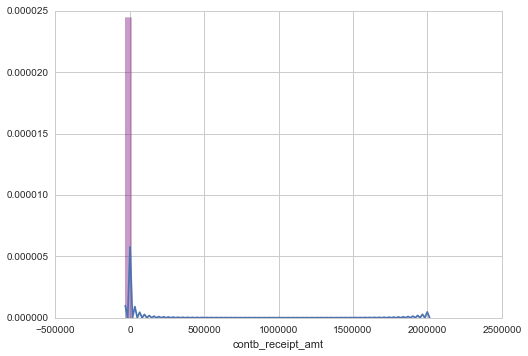

In [42]:
sns.distplot(donor_df['contb_receipt_amt'],hist_kws={'color':'purple'})

[(0, 500000)]

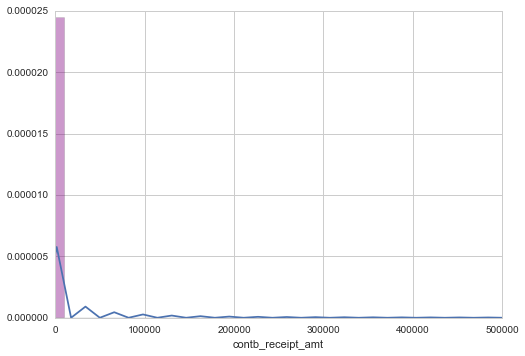

In [46]:
sns.distplot(donor_df['contb_receipt_amt'],hist_kws={'color':'purple'}).set(xlim=(0,500000))

[(500000, 2500000)]

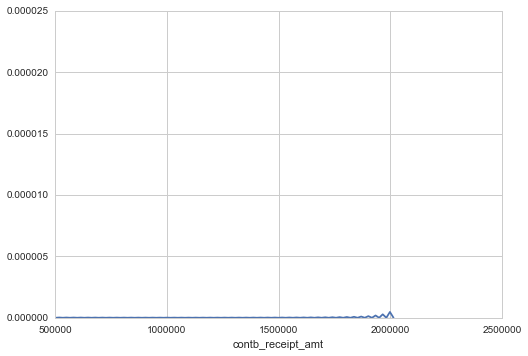

In [47]:
sns.distplot(donor_df['contb_receipt_amt'],hist_kws={'color':'purple'}).set(xlim=(500000,2500000))

In [49]:
top_donor=donor_df['contb_receipt_amt'].copy()

top_donor.sort()

top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [50]:
top_donor=top_donor[top_donor>0]

In [52]:
top_donor.sort()

In [54]:
top_donor.value_counts().head(10)

100     178188
50      137584
25      110345
250      91182
500      57984
2500     49005
35       37237
1000     36494
10       33986
200      27813
dtype: int64

In [76]:
com_don=Series([i for i in top_donor if i>10 and i<2500])

In [77]:
com_don

0           10.01
1           10.01
2           10.01
3           10.02
4           10.02
5           10.05
6           10.05
7           10.06
8           10.06
9           10.06
10          10.06
11          10.08
12          10.08
13          10.09
14          10.10
15          10.11
16          10.11
17          10.11
18          10.11
19          10.12
20          10.13
21          10.16
22          10.16
23          10.18
24          10.19
25          10.19
26          10.19
27          10.19
28          10.20
29          10.20
           ...   
890564    2495.00
890565    2495.00
890566    2495.00
890567    2495.00
890568    2495.00
890569    2495.00
890570    2495.00
890571    2495.00
890572    2495.00
890573    2495.00
890574    2495.00
890575    2495.00
890576    2495.00
890577    2497.00
890578    2497.00
890579    2497.00
890580    2497.00
890581    2497.00
890582    2497.00
890583    2497.00
890584    2498.00
890585    2498.00
890586    2498.00
890587    2498.00
890588    

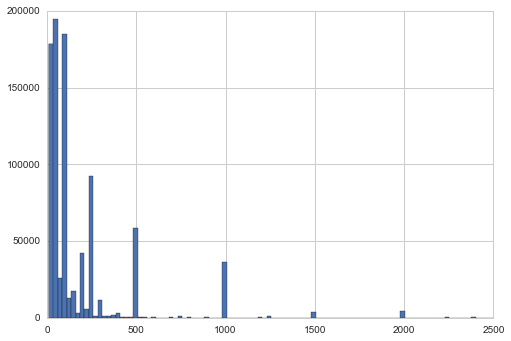

In [78]:
com_don.hist(bins=100)

In [79]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.686334e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.245483e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.190165e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [80]:
candidates=donor_df['cand_nm'].unique()

In [81]:
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [82]:
party_map={'Bachmann, Michelle':'Republican', 
           'Romney, Mitt':'Republican', 
           'Obama, Barack':'Democrat',
            "Roemer, Charles E. 'Buddy' III":'Republican', 
           'Pawlenty, Timothy':'Republican',
            'Johnson, Gary Earl':'Republican', 
            'Paul, Ron':'Republican', 
           'Santorum, Rick':'Republican',
           'Cain, Herman':'Republican',
           'Gingrich, Newt':'Republican', 
           'McCotter, Thaddeus G':'Republican', 
           'Huntsman, Jon':'Republican',
           'Perry, Rick':'Republican'}

In [83]:
donor_df['Party']=donor_df['cand_nm'].map(party_map)

In [84]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.686334e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.245483e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.190165e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [85]:
donor_df=donor_df[donor_df['contb_receipt_amt']>0]

In [86]:
donor_df.groupby('cand_nm').count()['contb_receipt_amt']

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [87]:
donor_df.groupby('cand_nm').sum()['contb_receipt_amt']

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [94]:
cand_amount=donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i=0

for don in cand_amount:
    print 'The candidate %s raise %.0f dollars'%(cand_amount.index[i],don)
    print '\n'
    i+=1

The candidate Bachmann, Michelle raise 2711439 dollars


The candidate Cain, Herman raise 7101082 dollars


The candidate Gingrich, Newt raise 12832770 dollars


The candidate Huntsman, Jon raise 3330373 dollars


The candidate Johnson, Gary Earl raise 566962 dollars


The candidate McCotter, Thaddeus G raise 39030 dollars


The candidate Obama, Barack raise 135877427 dollars


The candidate Paul, Ron raise 21009620 dollars


The candidate Pawlenty, Timothy raise 6004819 dollars


The candidate Perry, Rick raise 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raise 373010 dollars


The candidate Romney, Mitt raise 88335908 dollars


The candidate Santorum, Rick raise 11043159 dollars




In [126]:
1+1

2

In [105]:
list(cand_amount.index)

['Bachmann, Michelle',
 'Cain, Herman',
 'Gingrich, Newt',
 'Huntsman, Jon',
 'Johnson, Gary Earl',
 'McCotter, Thaddeus G',
 'Obama, Barack',
 'Paul, Ron',
 'Pawlenty, Timothy',
 'Perry, Rick',
 "Roemer, Charles E. 'Buddy' III",
 'Romney, Mitt',
 'Santorum, Rick']

In [107]:
cand_amount['Bachmann, Michelle']

2711439.29

In [110]:
amount=[]
cand_name=list(cand_amount.index)
for i in cand_name:
    amount.append(cand_amount[i])

In [111]:
cand_name

['Bachmann, Michelle',
 'Cain, Herman',
 'Gingrich, Newt',
 'Huntsman, Jon',
 'Johnson, Gary Earl',
 'McCotter, Thaddeus G',
 'Obama, Barack',
 'Paul, Ron',
 'Pawlenty, Timothy',
 'Perry, Rick',
 "Roemer, Charles E. 'Buddy' III",
 'Romney, Mitt',
 'Santorum, Rick']

In [112]:
amount

[2711439.29,
 7101081.8900000462,
 12832769.689999999,
 3330373.48,
 566961.60000000009,
 39030.0,
 135877427.24000013,
 21009619.829994153,
 6004819.4799999995,
 20305753.999999974,
 373009.89999999991,
 88335907.530000284,
 11043159.309999963]

In [120]:
df_cand_amnt=DataFrame(zip(cand_name,amount))

In [122]:
df_cand_amnt.columns=['cand_name','amount']

In [123]:
df_cand_amnt

,cand_name,amount
0,"Bachmann, Michelle",2.711439e+06
1,"Cain, Herman",7.101082e+06
2,"Gingrich, Newt",1.283277e+07
3,"Huntsman, Jon",3.330373e+06
4,"Johnson, Gary Earl",5.669616e+05
5,"McCotter, Thaddeus G",3.903000e+04
6,"Obama, Barack",1.358774e+08
7,"Paul, Ron",2.100962e+07
8,"Pawlenty, Timothy",6.004819e+06
9,"Perry, Rick",2.030575e+07


In [127]:
df_cand_amnt['Party']=df_cand_amnt['cand_name'].map(party_map)

In [128]:
df_cand_amnt

,cand_name,amount,Party
0,"Bachmann, Michelle",2.711439e+06,Republican
1,"Cain, Herman",7.101082e+06,Republican
2,"Gingrich, Newt",1.283277e+07,Republican
3,"Huntsman, Jon",3.330373e+06,Republican
4,"Johnson, Gary Earl",5.669616e+05,Republican
5,"McCotter, Thaddeus G",3.903000e+04,Republican
6,"Obama, Barack",1.358774e+08,Democrat
7,"Paul, Ron",2.100962e+07,Republican
8,"Pawlenty, Timothy",6.004819e+06,Republican
9,"Perry, Rick",2.030575e+07,Republican


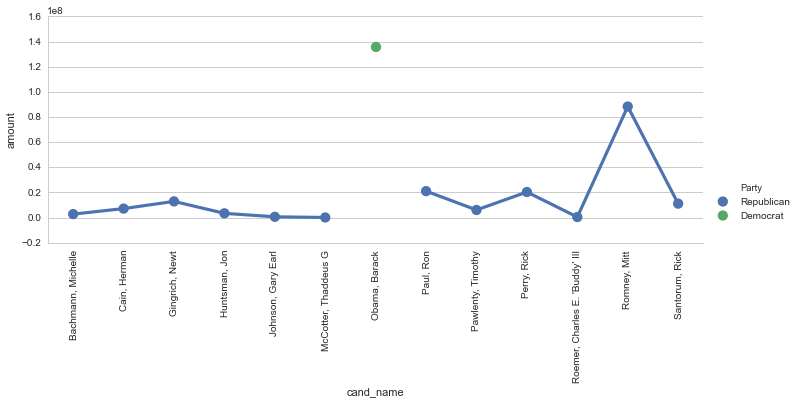

In [157]:
g=sns.factorplot(x='cand_name',y='amount',data=df_cand_amnt,hue='Party',aspect=2.5)
g.set_xticklabels(rotation=90)

In [148]:
cand_amount

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [160]:
sum_by_party=df_cand_amnt.groupby('Party').sum()

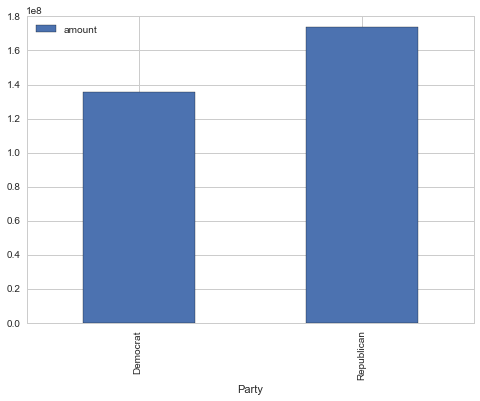

In [161]:
sum_by_party.plot(kind='bar')

In [164]:
donor_df.head()


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.686334e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.245483e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.190165e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [165]:
ocupation_df=donor_df.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='Party',aggfunc='sum')

In [180]:
ocupation_df


Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100,NaN
AREA VICE PRESIDENT,250,NaN
RESEARCH ASSOCIATE,100,NaN
TEACHER,500,NaN
THERAPIST,3900,NaN
'MIS MANAGER,NaN,177.60
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.00
(RETIRED),NaN,250.00
-,5000,2114.80


In [178]:
ocupation_df.shape

(45067, 2)

In [181]:
ocupation_df=ocupation_df[ocupation_df.sum(1)>1000000]

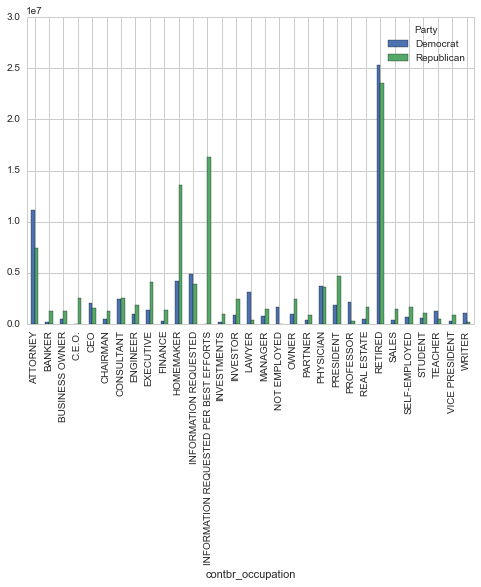

In [182]:
ocupation_df.plot(kind='bar')

In [199]:
mlt.style.use('ggplot')
print plt.style.available


[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']


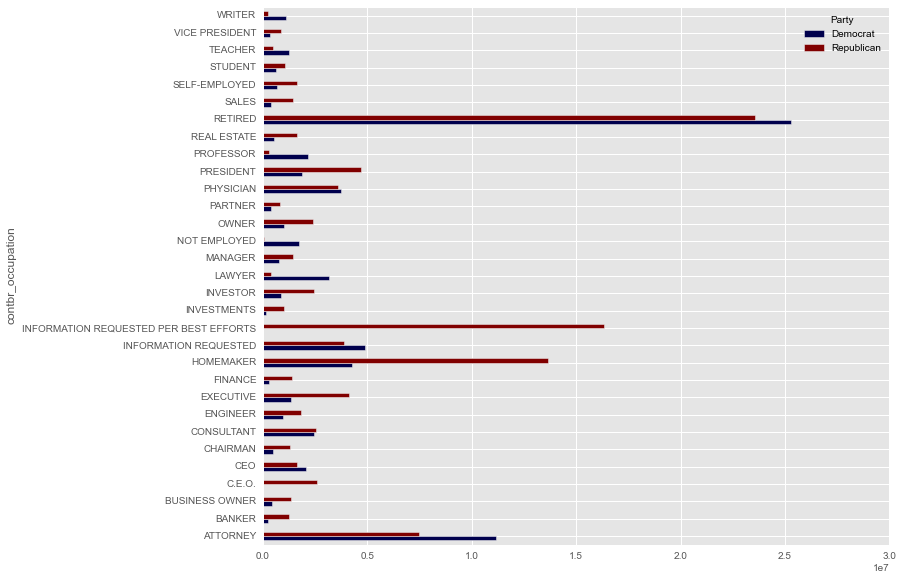

In [206]:
ocupation_df.plot(kind='barh',figsize=(10,9),cmap='seismic')

In [207]:
ocupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

C:\Users\Bose\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [209]:
ocupation_df.loc['CEO']=ocupation_df.loc['CEO']+ocupation_df.loc['C.E.O.']

C:\Users\Bose\AppData\Local\Dato\Dato Launcher\lib\site-packages\pandas\core\indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Bose\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [210]:
ocupation_df.drop('C.E.O.',inplace=True)

C:\Users\Bose\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


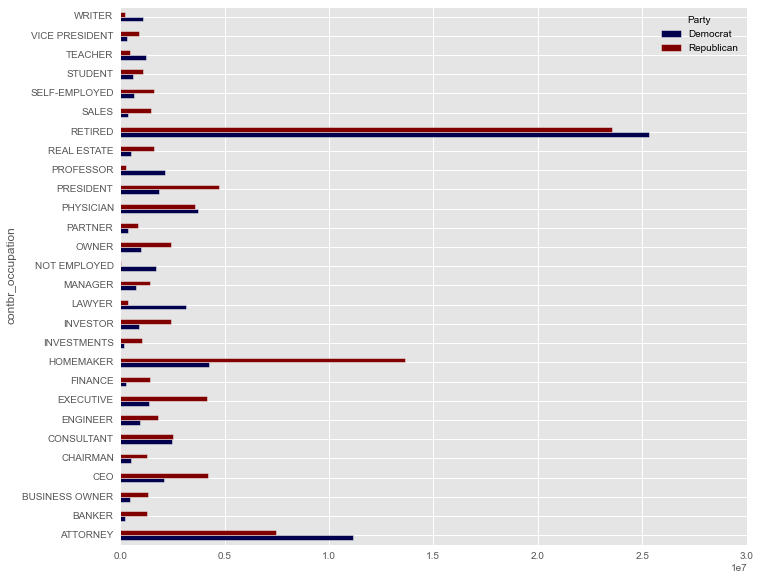

In [211]:
ocupation_df.plot(kind='barh',figsize=(10,9),cmap='seismic')